## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

## Reading and understanding data

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.shape

(284807, 31)

In [6]:
df.describe([0.25, 0.5, 0.75, 0.95, 0.99])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
95%,164143.400000,2.081223e+00,1.808585e+00,2.062635e+00,2.566501e+00,2.098960e+00,3.160382e+00,1.407632e+00,1.049984e+00,1.780783e+00,1.548557e+00,1.614033e+00,1.243053e+00,1.607877e+00,1.393653e+00,1.373090e+00,1.325253e+00,1.274609e+00,1.394392e+00,1.286164e+00,8.361441e-01,5.378677e-01,1.128987e+00,4.880160e-01,8.663576e-01,7.606986e-01,9.209154e-01,3.877462e-01,2.560897e-01,365.000000,0.000000
99%,170560.940000,2.237130e+00,3.801811e+00,2.728434e+00,4.248032e+00,3.424903e+00,4.200085e+00,2.696205e+00,2.075973e+00,2.986773e+00,3.253618e+00,2.290583e+00,1.698576e+00,2.513962e+00,2.150300e+00,1.925527e+00,1.874820e+00,2.289928e+00,2.068689e+00,2.262924e+00,2.412190e+00,1.931852e+00,1.530152e+00,1.508703e+00,1.063748e+00,1.203955e+00,1.158698e+00,9.313604e-01,5.411264e-01,1017.970000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00

In [7]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [8]:
print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


## Exploratory data analysis

<AxesSubplot:xlabel='Class', ylabel='count'>

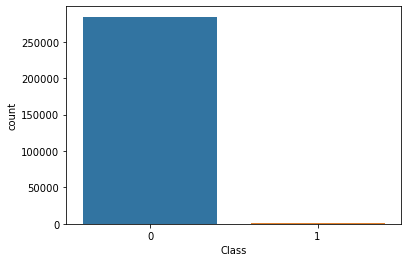

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

sns.countplot(df['Class'])

<AxesSubplot:xlabel='Class', ylabel='Time'>

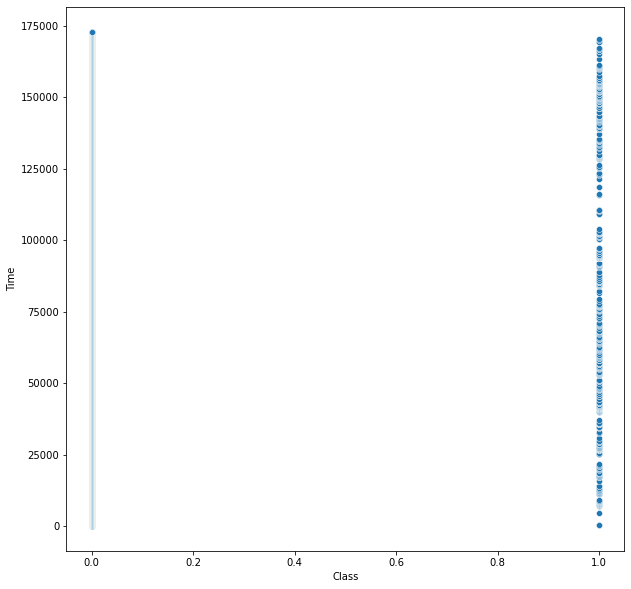

In [10]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize = (10,10))
sns.scatterplot(x = df['Class'] , y = df['Time'])

From the distribution of classes with time we can see that credit card frauds are spreaded over time.

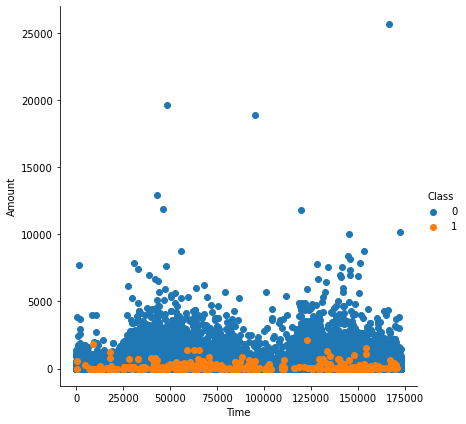

In [11]:
sns.FacetGrid(df, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

From the above graph we can see that the frauds are happening in the amount range of 0 to 3000 .

<AxesSubplot:xlabel='Class', ylabel='Amount'>

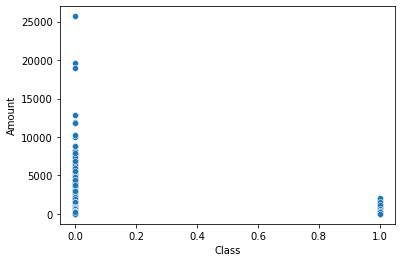

In [12]:
# Create a scatter plot to observe the distribution of classes with Amount

sns.scatterplot(x = df['Class'] , y = df['Amount'])

In [13]:
# Drop unnecessary columns

df = df.drop('Time', axis = 1)

In [14]:
countLess = 0
countMore= 0
for i in range(284807):
    if(df.iloc[i]["Amount"] < 3000):
        countLess = countLess + 1
    else:
        countMore = countMore + 1
print(countLess)
print(countMore)

284518
289


In [15]:
percentage = (countLess/284807)*100

percentage

99.89852777494936

So from the above we can see that 284518 number of transactions are below 3000, and maximum number of frauds are happening in the range of 0-3000.

Text(0.5, 1.0, 'Histograms of the Features')

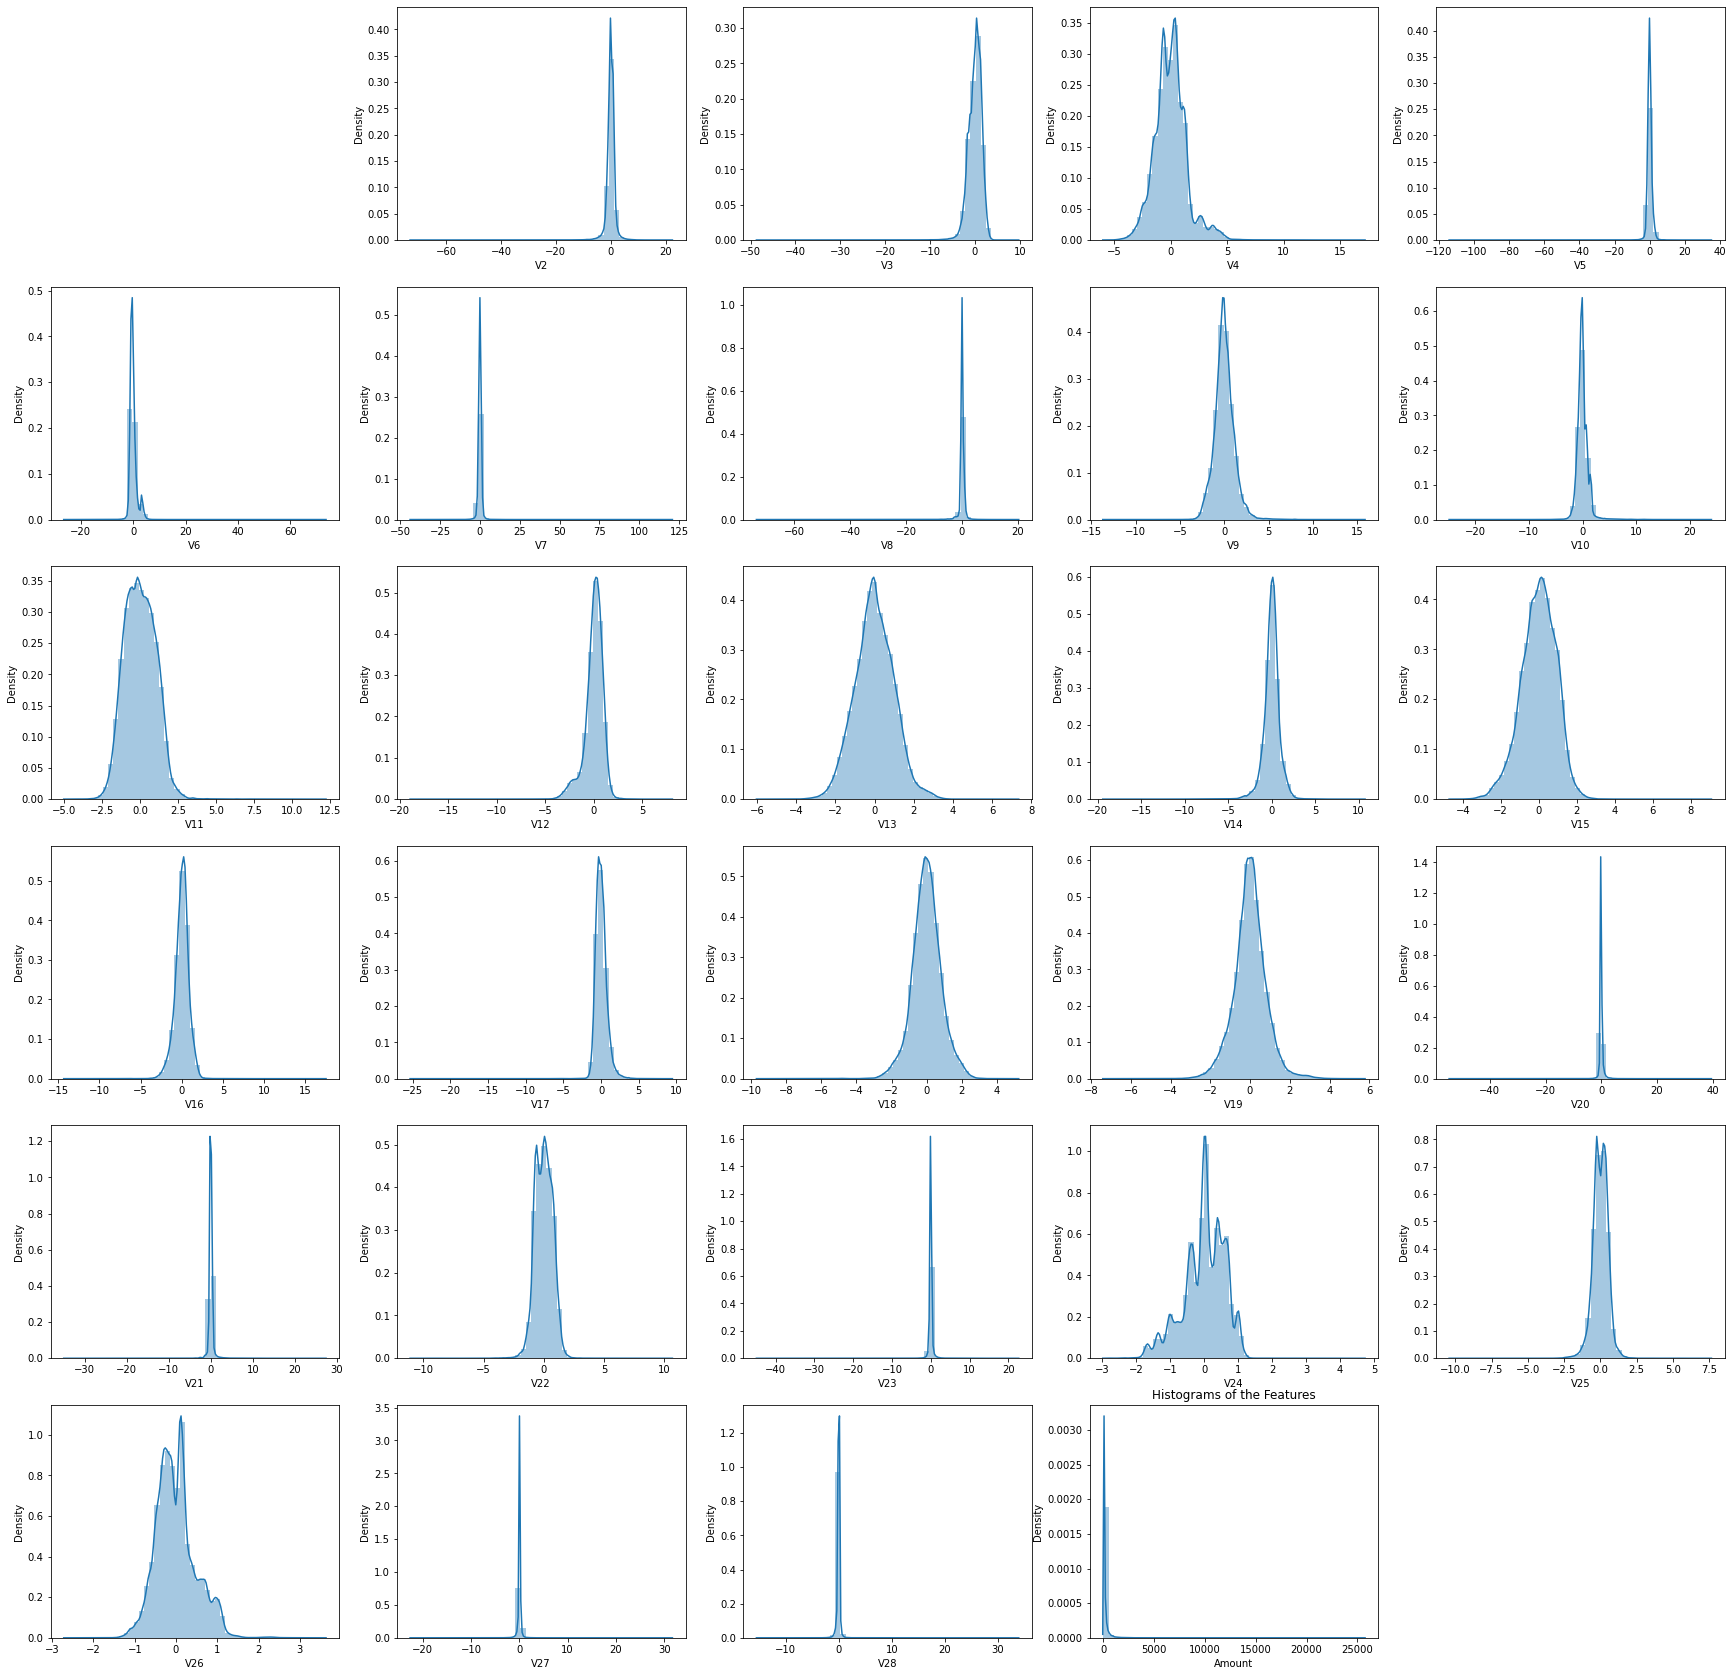

In [16]:
import matplotlib.pyplot as plt
nrows=6
ncols=5
fig, ax = plt.subplots(figsize=(30,30))  
for i in range(1,len(df.columns[:-1])):
  sp=plt.subplot(nrows,ncols,i+1)
  sns.distplot(df[df.columns[i]])
plt.title('Histograms of the Features')

## Checking for skewness in the data

In [18]:
p = df.drop('Class', axis = 1)
q = df['Class']

In [19]:
col = p.columns
col

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [20]:
# checking the skweness in the data

p.skew(axis= 0, skipna = True)

V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
dtype: float64

We can see some skewness in the data. So let's remove it by using power transform.

In [21]:
from sklearn.preprocessing import PowerTransformer

In [22]:
pt = PowerTransformer(standardize=True)
p = pt.fit_transform(p)

In [23]:
p = pd.DataFrame(data = p, columns = col)

In [24]:
# checking the skweness in the data

p.skew(axis = 0, skipna = True)

V1       -0.218003
V2        0.334852
V3       -0.079980
V4        0.018930
V5       -1.170100
V6       -1.937469
V7        2.594575
V8        2.297590
V9       -0.048343
V10      -1.318334
V11       0.060890
V12       0.158932
V13       0.006133
V14       0.105966
V15       0.013157
V16       0.137437
V17      -0.791141
V18      -0.059630
V19       0.015231
V20      -0.923653
V21      -1.966863
V22      -0.025686
V23      -0.249209
V24       0.112492
V25       0.077895
V26      -0.024102
V27       3.465031
V28       1.069193
Amount    0.018354
dtype: float64

In [25]:
df = pd.concat([p, q], join = 'outer', axis = 1)

In [26]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.904815,-0.131503,2.176074,0.983588,-0.256110,0.459227,0.193516,0.020305,0.380443,0.127074,-0.513088,-0.774671,-0.997398,-0.404755,1.711206,-0.600774,0.215544,0.009991,0.503467,0.323559,-0.007670,0.366644,-0.189647,0.015102,0.211929,-0.323884,0.323027,-0.053332,1.119013,0
1,0.626390,0.093067,-0.035062,0.387928,0.031947,0.045846,-0.063874,0.006711,-0.184488,-0.115195,1.523934,1.296242,0.498814,-0.232720,0.674890,0.491958,-0.175639,-0.238612,-0.169496,-0.093203,-0.298760,-0.884170,0.153342,-0.637483,0.288440,0.353130,-0.035793,0.057491,-1.128464,0
2,-0.904242,-0.871858,1.381297,0.341811,-0.374492,1.320901,0.639714,0.172348,-1.453859,0.234324,0.640742,-0.104954,0.724952,-0.255865,2.872435,-2.809663,1.383126,-0.165261,-2.838493,0.680896,0.357879,1.069496,1.501808,-1.133450,-0.653607,-0.209953,-0.151417,-0.173752,1.623286,0
3,-0.742857,-0.202760,1.401049,-0.581136,-0.019151,0.983351,0.191907,0.309141,-1.319689,-0.008922,-0.179270,0.026987,0.517344,-0.381222,-0.720269,-1.194700,-0.829186,2.435570,-1.528799,-0.273184,-0.133275,-0.013060,-0.317680,-1.756645,1.276336,-0.399896,0.144087,0.201524,1.012504,0
4,-0.823641,0.530197,1.160592,0.357540,-0.305614,0.187360,0.479194,-0.331706,0.769520,0.718432,-0.798770,0.496185,1.343525,-1.168769,0.138162,-0.580731,-0.319406,-0.066425,0.986458,0.528646,0.004660,1.107811,-0.232990,0.145885,-0.429239,1.053668,0.541488,0.669838,0.692981,0


Text(0.5, 1.0, 'Boxplots of the Features')

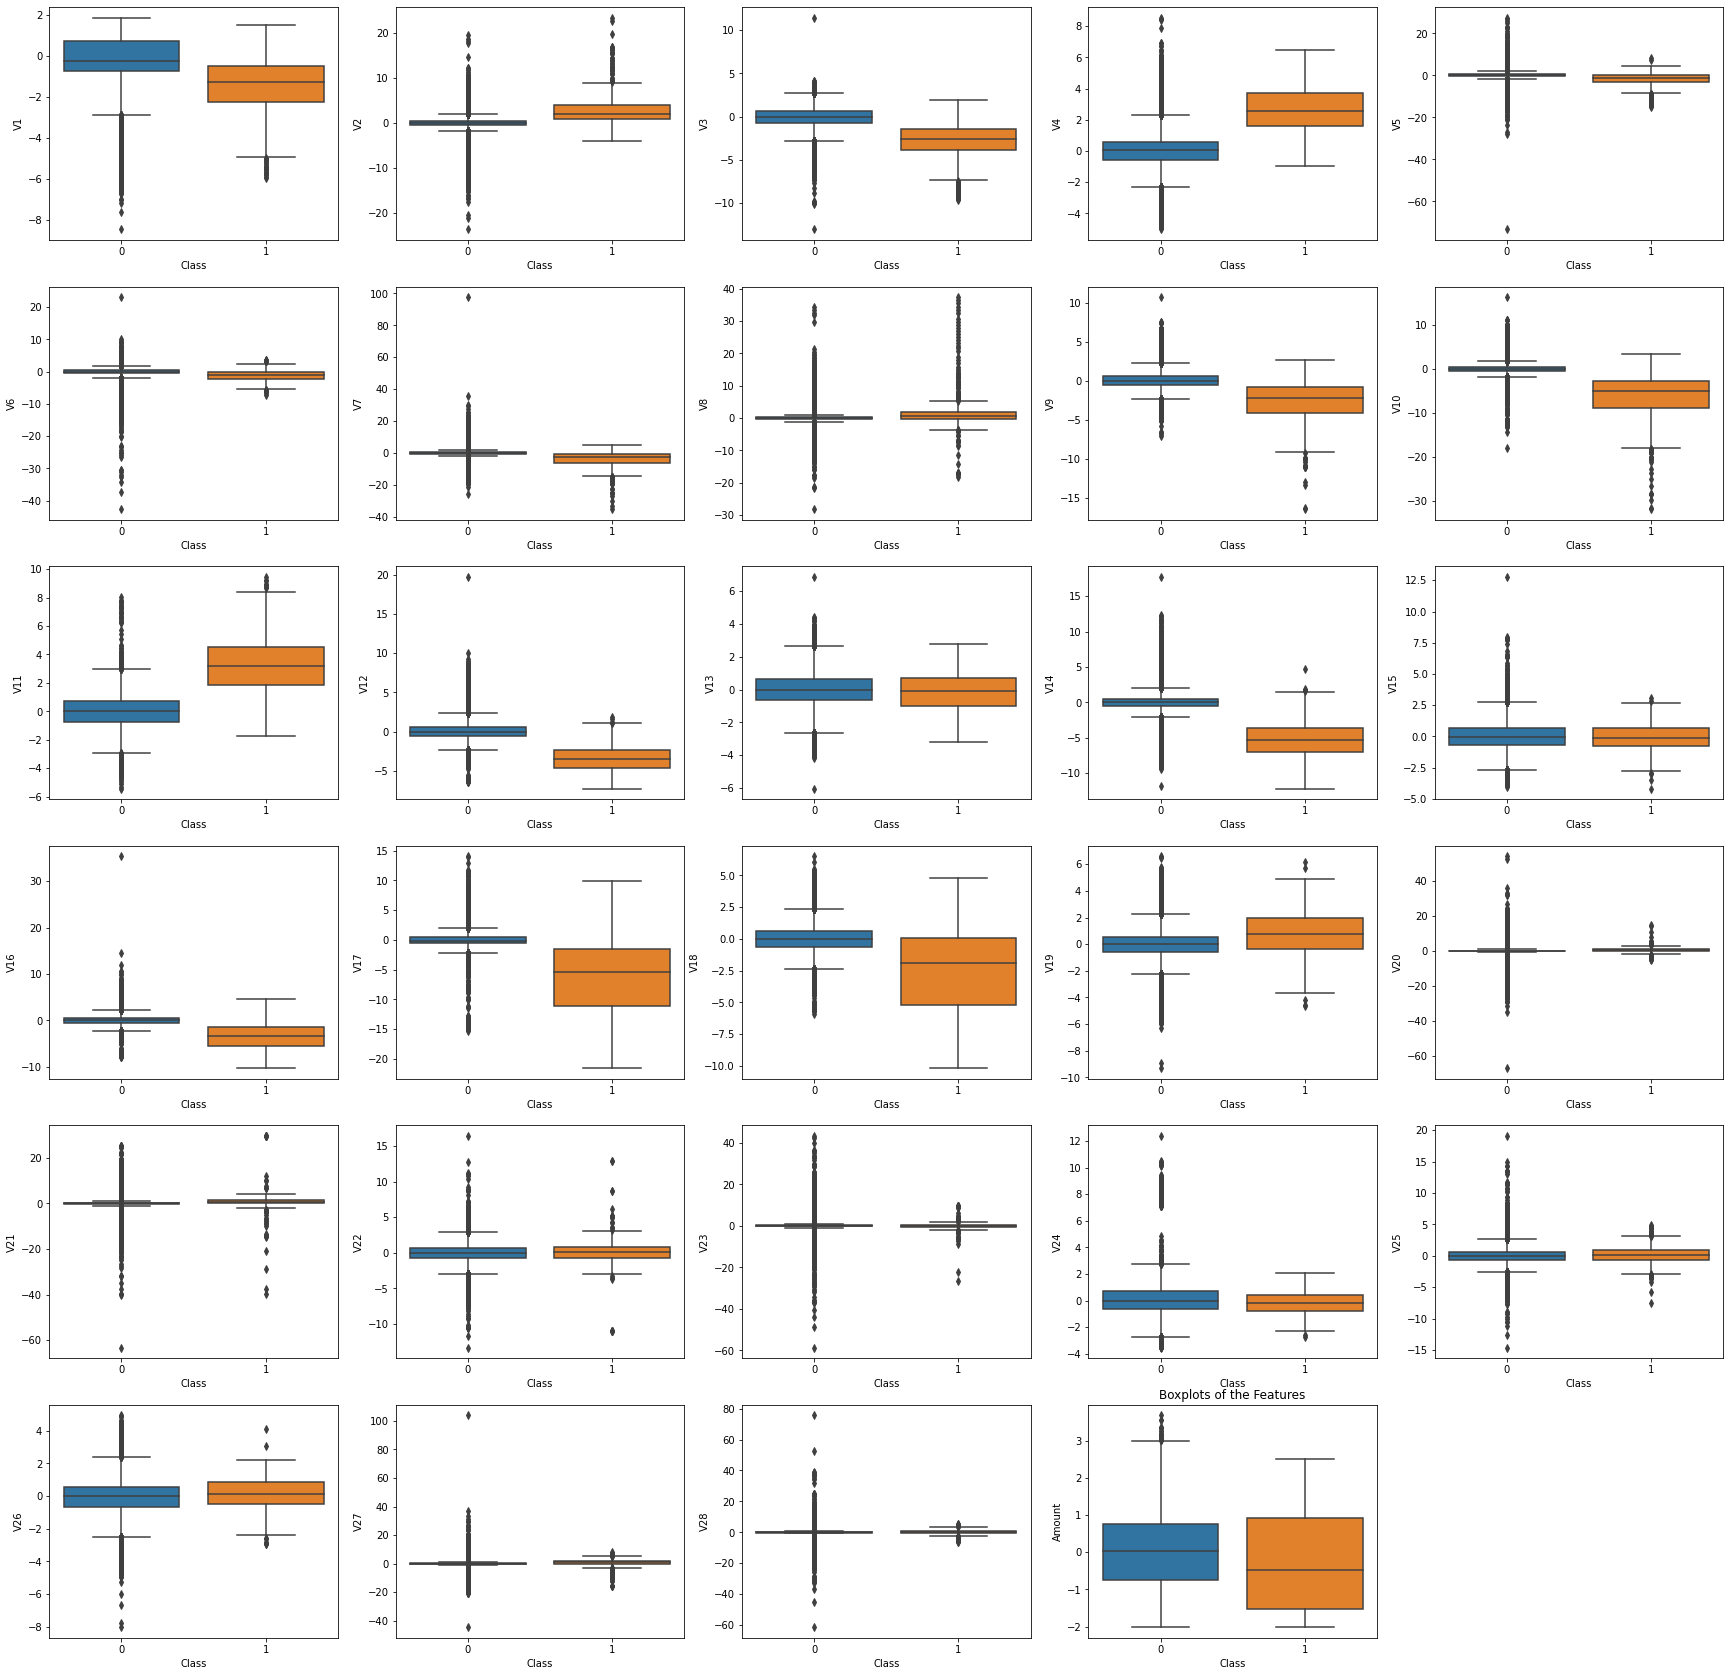

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
nrows=6
ncols=5
fig, ax = plt.subplots(figsize=(30,30))  
for i in range(0,len(df.columns[:-1])):
  sp=plt.subplot(nrows,ncols,i+1)
  sns.boxplot(x='Class',y=df.columns[i],data=df)
plt.title('Boxplots of the Features')

## Splitting the data into train & test data

In [28]:
y = df['Class']

X = df.drop("Class", axis = 1)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(213605, 29)
(71202, 29)
(213605,)
(71202,)


# Model Building

### Let's first build few models on the imbalanced dataset and check how they are performing

In the models as we have to detect which transcactions are FRAUD and which are NOT FRAUD , so we have to take Precision, Recall and F1 Scores as our evaluation Parameters.

## Logistic Regression on Imbalanced data

In [31]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

# Training the algorithm
lr_model.fit(X_train, y_train)

LogisticRegression()

In [32]:
lr_pred_test = lr_model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score

# Checking accuracy
accuracy_score(y_test, lr_pred_test)

0.9992556388865481

In [34]:
tn, fp, fn, tp = confusion_matrix(y_test, lr_pred_test).ravel()

conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])

conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,86,46
Not Fraud,7,71063


In [35]:
# Precision

lr_precision = precision_score(y_test, lr_pred_test)

lr_precision

0.9247311827956989

In [36]:
#Recall

lr_recall = recall_score(y_test, lr_pred_test)

lr_recall

0.6515151515151515

In [37]:
# f1 score

f1_score(y_test, lr_pred_test)

0.7644444444444445

LR model is giving good accuracy and good precision score , but the recall score is not that good.

## Decision Tree on Imbalanced data

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion='gini', splitter='best', random_state = 0)

In [39]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [40]:
dt_pred_test = dt_classifier.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score

# Checking accuracy
accuracy_score(y_test, dt_pred_test)

0.9992275497879273

In [42]:
tn, fp, fn, tp = confusion_matrix(y_test, dt_pred_test).ravel()

conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])

conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,103,29
Not Fraud,26,71044


In [43]:
# Precision

dt_precision = precision_score(y_test, dt_pred_test)
dt_precision

0.7984496124031008

In [44]:
#Recall

dt_recall = recall_score(y_test, lr_pred_test)
dt_recall

0.6515151515151515

In [45]:
# f1 score

f1_score(y_test, dt_pred_test)

0.789272030651341

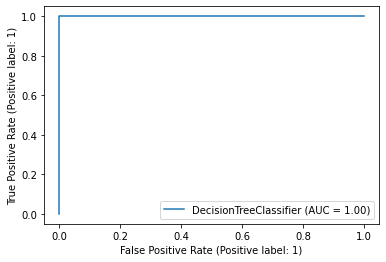

In [46]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(dt_classifier, X_train, y_train, drop_intermediate=False)
plt.show()

Decision Tree model is also not giving that much Precision and Recall score.

## Random Forest on Imbalanced data

In [47]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42,n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [48]:
rfc_pred_test=rfc.predict(X_test)

In [49]:
#accuracy

accuracy_score(y_test, rfc_pred_test)

0.9996207971686188

In [50]:
tn, fp, fn, tp = confusion_matrix(y_test, rfc_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,107,25
Not Fraud,2,71068


In [51]:
# Precision

rfc_precision = precision_score(y_test, rfc_pred_test)
rfc_precision

0.981651376146789

In [52]:
#Recall

rfc_recall = recall_score(y_test, rfc_pred_test)
rfc_recall

0.8106060606060606

In [53]:
# f1 score

f1_score(y_test, rfc_pred_test)

0.8879668049792531

In case of Random Forest we have got quite good Precision Recall and F1 score in the test dataset.

## XG Boost on Imbalanced data

In [54]:
from xgboost import XGBClassifier

[10:43:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:43:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:43:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:44:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

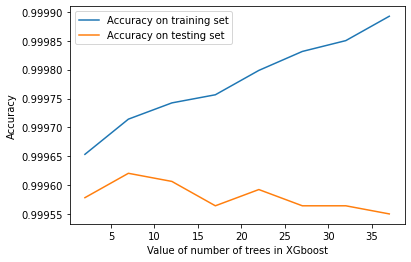

In [55]:
tree_range = range(2, 40, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train,y_train)
    score1.append(xgb.score(X_train,y_train))
    score2.append(xgb.score(X_test,y_test))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

From the above graph we can observe that with around 7 no of trees we are getting 0.997 accuracy on train data and 0.9962 accuracy on test data.

Hence I have choosen n_estimators = 7

In [56]:
xgb=XGBClassifier(n_estimators=7)
xgb.fit(X_train,y_train)

[10:45:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=7, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
xgb_pred_test=xgb.predict(X_test)

In [58]:
#accuracy

accuracy_score(y_test, xgb_pred_test)

0.9996207971686188

In [59]:
tn, fp, fn, tp = confusion_matrix(y_test, xgb_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,107,25
Not Fraud,2,71068


In [60]:
# Precision

xgb_precision = precision_score(y_test, xgb_pred_test)
xgb_precision

0.981651376146789

In [61]:
#Recall

xgb_recall = recall_score(y_test, xgb_pred_test)
xgb_recall

0.8106060606060606

In [62]:
# f1 score

f1_score(y_test, xgb_pred_test)

0.8879668049792531

With XGBoost also we are getting quite good Precision, Recall and F1 Score on the test data.

# Models using Cross Validation and Class Balanced technique

## Logistic Regression Cross Validation and Class Balanced technique

In [63]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv = LogisticRegressionCV(cv=10, random_state=42,class_weight='balanced',max_iter=1000)

# Training the algorithm
lr_cv.fit(X_train, y_train)

LogisticRegressionCV(class_weight='balanced', cv=10, max_iter=1000,
                     random_state=42)

In [64]:
lr_cv_pred_test=lr_cv.predict(X_test)

In [65]:
#accuracy

accuracy_score(y_test, lr_cv_pred_test)

0.98706497008511

In [66]:
tn, fp, fn, tp = confusion_matrix(y_test, lr_cv_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,113,19
Not Fraud,902,70168


In [67]:
# Precision

lr_cv_precision = precision_score(y_test, lr_cv_pred_test)
lr_cv_precision

0.11133004926108374

In [68]:
#Recall

lr_cv_recall = recall_score(y_test, lr_cv_pred_test)
lr_cv_recall

0.8560606060606061

In [69]:
# f1 score

f1_score(y_test, lr_cv_pred_test)

0.1970357454228422

Here logistic Regression is not performming well with cross validation and data balance technique, as we can see the precision score is quite low.So let's try few other models.

## Cross Validation and Hyper-parameter tuning for Decision Tree

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
dtcv = DecisionTreeClassifier(class_weight = "balanced", random_state=42)

In [72]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50]
}

In [73]:
dt_grid_search = GridSearchCV(estimator=dtcv,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [74]:
%%time
dt_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Wall time: 1min 49s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50]},
             scoring='accuracy', verbose=1)

In [75]:
dt_grid_search.best_score_

0.9983099646543854

In [76]:
dt_best = dt_grid_search.best_estimator_
dt_best

DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=5, random_state=42)

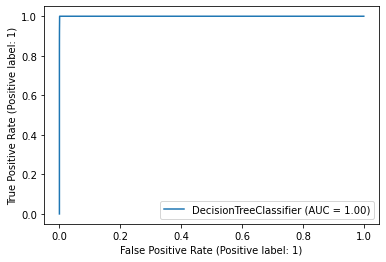

In [77]:
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

In [78]:
dtcv_pred_test=dt_best.predict(X_test)

In [79]:
#accuracy

accuracy_score(y_test, dtcv_pred_test)

0.9984550995758547

In [80]:
tn, fp, fn, tp = confusion_matrix(y_test, dtcv_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,105,27
Not Fraud,83,70987


In [81]:
# Precision

dtcv_precision = precision_score(y_test, dtcv_pred_test)
dtcv_precision

0.5585106382978723

In [82]:
#Recall

dtcv_recall = recall_score(y_test, dtcv_pred_test)
dtcv_recall

0.7954545454545454

In [83]:
# f1 score

f1_score(y_test, dtcv_pred_test)

0.6562499999999999

With hyper-parameter tuning Decision tree is not performing that good.

## Random Forest with Hyper Parameter tuning and Cross Validation

In [84]:
rfcv= RandomForestClassifier(class_weight = "balanced", random_state=42, n_jobs=-1)

In [85]:
params = {
    'max_depth': [2,3,5,10],
    'min_samples_leaf': [5,10,20],
    'n_estimators': [10, 25, 50, 100]
}

In [86]:
rfcv_grid_search = GridSearchCV(estimator=rfcv,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [87]:
%%time
rfcv_grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
Wall time: 19min 24s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [88]:
rfcv_grid_search.best_score_

0.9993960810044435

In [89]:
rfcv_best = rfcv_grid_search.best_estimator_
rfcv_best

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=10, n_jobs=-1, random_state=42)

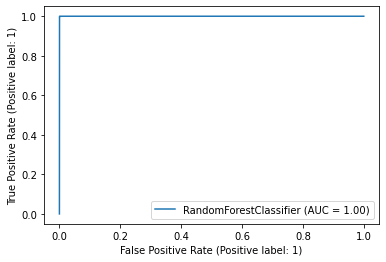

In [90]:
plot_roc_curve(rfcv_best, X_train, y_train)
plt.show()

In [91]:
rfcv_pred_test=rfcv_best.predict(X_test)

In [92]:
#accuracy

accuracy_score(y_test, rfcv_pred_test)

0.9994241734782731

In [93]:
tn, fp, fn, tp = confusion_matrix(y_test, rfcv_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,109,23
Not Fraud,18,71052


In [94]:
# Precision

rfcv_precision = precision_score(y_test, rfcv_pred_test)
rfcv_precision

0.8582677165354331

In [95]:
#Recall

rfcv_recall = recall_score(y_test, rfcv_pred_test)
rfcv_recall

0.8257575757575758

In [96]:
# f1 score

f1_score(y_test, rfcv_pred_test)

0.8416988416988417

Here we can see that Random forest is doing well with Cross validation, hyper parameter tuning and class balance.

 # Handling Class Imbalance

We are going to use only Oversample in this case bacause we have only two classes "Fraud" and "Not Fraud". 

In case of under sampling we will loose huge anound of data as the Not Fraud class count is very low. So only Over sampling techniques are used here.

## Oversampling Minority Class

In [97]:
# concatenate our training data back together

X = pd.concat([X_train, y_train], axis=1)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
264873,-0.476905,0.998927,-0.679945,-0.086462,0.257966,-1.231727,0.643864,-0.135622,0.358042,-0.285827,-0.613920,-0.680578,-0.631557,-0.795475,0.831815,-0.016507,0.616542,0.895231,-0.268559,0.066752,0.335644,1.334684,-0.288508,-0.168108,-0.627625,-0.289897,0.148957,-0.102761,-1.119613,0
163821,1.340215,-0.083036,-1.173451,0.893509,0.370887,-0.447679,0.407468,-0.267804,0.160745,0.446903,0.296341,0.254045,-1.328377,1.019004,-1.161910,-0.520660,-0.550440,0.068055,0.239289,-0.372969,0.136977,0.434827,-0.122617,-0.750670,0.813036,-1.047257,-0.091422,-0.213677,0.349930,0
72083,0.551530,-0.190841,0.280429,0.542230,-0.199132,0.585688,-0.353411,0.287070,0.448213,-0.063815,1.218140,1.217922,-0.792434,0.120879,-0.617381,-0.872639,0.502600,-1.073545,-0.288692,-0.297689,0.030329,0.387989,-0.057793,-0.489454,0.738439,1.019720,0.013467,-0.014078,-1.536955,0
196949,1.195771,0.592544,-1.151193,2.532387,0.677805,-0.074660,0.123435,-0.011556,-0.995067,0.349211,0.997390,-0.681422,-0.748953,-2.479023,-1.099340,3.046112,1.619871,1.990633,-1.997261,-0.199118,-0.174779,-0.633433,0.148842,-1.096759,-0.324781,-0.120012,-0.013405,0.066446,0.341622,0
126213,0.328180,-0.790769,0.287773,0.479816,-0.896659,0.262852,-0.430486,-0.016708,-0.651592,0.719604,0.537487,0.734684,0.482025,-0.157034,-0.439132,-1.269028,-0.549318,2.541183,-0.952912,-0.062373,-0.082971,-0.170342,-0.505799,-0.079169,0.886076,-0.453485,0.066467,0.199841,1.371178,0


In [98]:
from sklearn.utils import resample

not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

fraud_upsample = resample(fraud, replace = True, n_samples=len(not_fraud), random_state = 27)

upsampled = pd.concat([not_fraud, fraud_upsample])


In [99]:
upsampled.Class.value_counts()

1    213245
0    213245
Name: Class, dtype: int64

In [100]:
y_oms = upsampled.Class
X_oms = upsampled.drop('Class', axis=1)

## Random Forest with CV and Hyper parameter tuning post Oversampling Minority Class

In [101]:
rf= RandomForestClassifier(random_state=42, n_jobs=-1)

In [102]:
params = {
    'max_depth': [2,3,5,10],
    'min_samples_leaf': [5,10,20],
    'n_estimators': [10, 25, 50, 100]
}

In [103]:
rfcv_oms_grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [104]:
%%time
rfcv_oms_grid_search.fit(X_oms, y_oms)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
Wall time: 31min 3s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [105]:
rfcv_oms_grid_search.best_score_

0.9983985522103442

In [106]:
rfcv_oms_best = rfcv_oms_grid_search.best_estimator_
rfcv_best

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=10, n_jobs=-1, random_state=42)

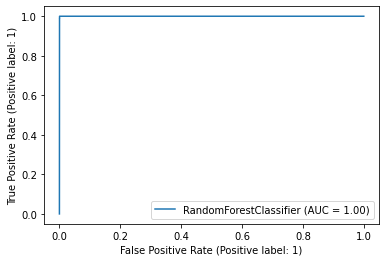

In [107]:
plot_roc_curve(rfcv_oms_best, X_oms, y_oms)
plt.show()

In [108]:
rfcv_oms_pred_test=rfcv_oms_best.predict(X_test)

In [109]:
#accuracy

accuracy_score(y_test, rfcv_oms_pred_test)

0.9993679952810315

In [110]:
tn, fp, fn, tp = confusion_matrix(y_test, rfcv_oms_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,111,21
Not Fraud,24,71046


In [111]:
# Precision

rfcv_oms_precision = precision_score(y_test, rfcv_oms_pred_test)
rfcv_oms_precision

0.8222222222222222

In [112]:
#Recall

rfcv_oms_recall = recall_score(y_test, rfcv_oms_pred_test)
rfcv_oms_recall

0.8409090909090909

In [113]:
# f1 score

f1_score(y_test, rfcv_oms_pred_test)

0.8314606741573033

Random forest is giving good Precision , Recall and F1 score with with CV and Hyper parameter tuning post Oversampling Minority Class.

## XG Boost with CV and Hyper parameter tuning post Oversampling Minority Class

[13:17:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:17:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:17:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:17:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

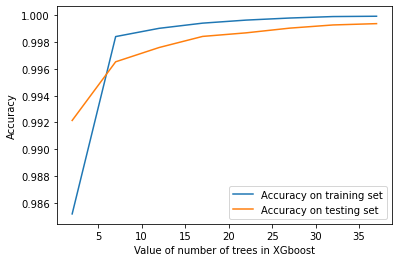

In [114]:
tree_range = range(2, 40, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_oms,y_oms)
    score1.append(xgb.score(X_oms,y_oms))
    score2.append(xgb.score(X_test,y_test))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

From the above graph after no of trees= 35 , training accuracy = 0.999, and test accuracy = 0.9985.

So the final n_estimators = 40 .

In [115]:
xgb=XGBClassifier(n_estimators=40)
xgb.fit(X_oms,y_oms)

[13:19:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=40, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [116]:
oms_xgb_pred_test=xgb.predict(X_test)

In [117]:
#accuracy

accuracy_score(y_test, oms_xgb_pred_test)

0.9994522625768939

In [118]:
tn, fp, fn, tp = confusion_matrix(y_test, oms_xgb_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,111,21
Not Fraud,18,71052


In [119]:
# Precision

oms_xgb_precision = precision_score(y_test, oms_xgb_pred_test)
oms_xgb_precision

0.8604651162790697

In [120]:
#Recall

oms_xgb_recall = recall_score(y_test, oms_xgb_pred_test)
oms_xgb_recall

0.8409090909090909

In [121]:
# f1 score

f1_score(y_test, oms_xgb_pred_test)

0.8505747126436781

XGBoost is giving good Precision , Recall and F1 score with with CV and Hyper parameter tuning post Oversampling Minority Class.

## Random Over-sampling with imblearn

In [122]:
from imblearn.over_sampling import RandomOverSampler

In [123]:
y = df['Class']
X = df.drop("Class", axis = 1)

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [125]:
ros = RandomOverSampler(random_state=42)

In [126]:
x_ros, y_ros = ros.fit_resample(X_train, y_train)

## Random Forest with CV and Hyper parameter tuning post Random OverSampling

In [127]:
rf= RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10],
    'min_samples_leaf': [5,10,20],
    'n_estimators': [10, 25, 50, 100]
}

In [128]:
rfcv_ros_grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [129]:
%%time
rfcv_ros_grid_search.fit(x_ros, y_ros)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
Wall time: 28min 59s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [130]:
rfcv_ros_grid_search.best_score_

0.9980210541858728

In [131]:
rfcv_ros_best = rfcv_ros_grid_search.best_estimator_
rfcv_ros_best

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=50,
                       n_jobs=-1, random_state=42)

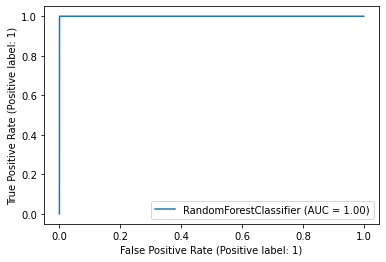

In [132]:
plot_roc_curve(rfcv_ros_best, x_ros, y_ros)
plt.show()

In [133]:
rfcv_ros_pred_test=rfcv_ros_best.predict(X_test)

In [134]:
#accuracy

accuracy_score(y_test, rfcv_ros_pred_test)

0.9992696834358585

In [135]:
tn, fp, fn, tp = confusion_matrix(y_test, rfcv_ros_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,111,21
Not Fraud,31,71039


In [136]:
# Precision

rfcv_ros_precision = precision_score(y_test, rfcv_ros_pred_test)
rfcv_ros_precision

0.7816901408450704

In [137]:
#Recall

rfcv_ros_recall = recall_score(y_test, rfcv_ros_pred_test)
rfcv_ros_recall

0.8409090909090909

In [138]:
# f1 score

f1_score(y_test, rfcv_ros_pred_test)

0.8102189781021898

Random Forest model with CV and Hyper parameter tuning post Random OverSampling has given good Precision score but not that good recalls score.

## XGBoost with CV and Hyper parameter tuning post Random OverSampling

[13:50:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:50:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:50:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:50:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

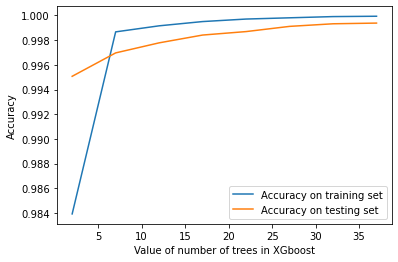

In [139]:
tree_range = range(2, 40, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(x_ros,y_ros)
    score1.append(xgb.score(x_ros,y_ros))
    score2.append(xgb.score(X_test,y_test))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

From the above graph we can observe that with around 40 no of trees we are getting 0.999 accuracy on train data and 0.998 accuracy on test data.

Hence I have choosen n_estimators = 40

In [140]:
xgb_ros=XGBClassifier(n_estimators=40)
xgb_ros.fit(x_ros,y_ros)

[13:53:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=40, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [141]:
ros_xgb_pred_test=xgb_ros.predict(X_test)

In [142]:
#accuracy

accuracy_score(y_test, ros_xgb_pred_test)

0.9994522625768939

In [143]:
tn, fp, fn, tp = confusion_matrix(y_test, ros_xgb_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,110,22
Not Fraud,17,71053


In [144]:
# Precision

ros_xgb_precision = precision_score(y_test, ros_xgb_pred_test)
ros_xgb_precision

0.8661417322834646

In [145]:
#Recall

ros_xgb_recall = recall_score(y_test, ros_xgb_pred_test)
ros_xgb_recall

0.8333333333333334

In [146]:
# f1 score

f1_score(y_test, ros_xgb_pred_test)

0.8494208494208495

## Synthetic Minority Oversampling Technique (SMOTE)

In [147]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

In [148]:
y = df['Class']
X = df.drop("Class", axis = 1)

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [150]:
# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [151]:
print(X_smote.shape)
print(y_smote.shape)

(426490, 29)
(426490,)


## Random Forest with CV and Hyper parameter tuning post SMOTE

In [152]:
rf= RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10],
    'min_samples_leaf': [5,10,20],
    'n_estimators': [10, 25, 50, 100]
}

In [153]:
rfcv_smote_grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [154]:
%%time
rfcv_smote_grid_search.fit(X_smote, y_smote)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
Wall time: 39min 55s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [155]:
rfcv_smote_grid_search.best_score_

0.9929376993371624

In [156]:
rfcv_smote_best = rfcv_smote_grid_search.best_estimator_
rfcv_smote_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

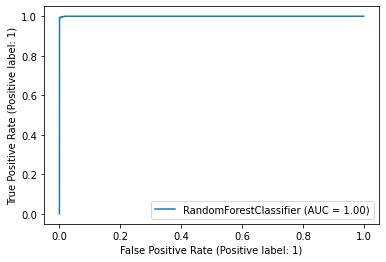

In [157]:
plot_roc_curve(rfcv_smote_best, X_train, y_train)
plt.show()

In [158]:
rfcv_smote_pred_test=rfcv_smote_best.predict(X_test)

In [159]:
#accuracy

accuracy_score(y_test, rfcv_smote_pred_test)

0.9981320749417151

In [160]:
tn, fp, fn, tp = confusion_matrix(y_test, rfcv_smote_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,111,21
Not Fraud,112,70958


In [161]:
# Precision

rfcv_smote_precision = precision_score(y_test, rfcv_smote_pred_test)
rfcv_smote_precision

0.4977578475336323

In [162]:
#Recall

rfcv_smote_recall = recall_score(y_test, rfcv_smote_pred_test)
rfcv_smote_recall

0.8409090909090909

In [163]:
# f1 score

f1_score(y_test, rfcv_smote_pred_test)

0.6253521126760563

## XGBoost with CV and Hyper parameter tuning post SMOTE

[14:34:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:34:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

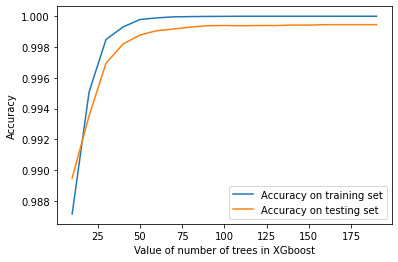

In [164]:
tree_range = range(10, 200, 10)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_smote, y_smote)
    score1.append(xgb.score(X_smote, y_smote))
    score2.append(xgb.score(X_test,y_test))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [165]:
xgb_smote=XGBClassifier(n_estimators=150)
xgb_smote.fit(X_smote, y_smote)

[15:04:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [166]:
smote_xgb_pred_test=xgb_smote.predict(X_test)

In [167]:
tn, fp, fn, tp = confusion_matrix(y_test, smote_xgb_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,113,19
Not Fraud,22,71048


In [168]:
#accuracy

accuracy_score(y_test, smote_xgb_pred_test)

0.9994241734782731

In [169]:
# Precision

smote_xgb_precision = precision_score(y_test, smote_xgb_pred_test)
smote_xgb_precision

0.837037037037037

In [170]:
#Recall

smote_xgb_recall = recall_score(y_test, smote_xgb_pred_test)
smote_xgb_recall

0.8560606060606061

In [171]:
# f1 score

f1_score(y_test, smote_xgb_pred_test)

0.8464419475655431

## Applying ADASYN to handle class Imbalance

In [172]:
y = df['Class']
X = df.drop("Class", axis = 1)

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [174]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(213605, 29)
(71202, 29)
(213605,)
(71202,)


In [175]:
from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



In [176]:
print(X_train_adasyn.shape)
print(y_train_adasyn.shape)

(426451, 29)
(426451,)


## Random Forest with CV and Hyper parameter tuning post ADASYN

In [177]:
rf= RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10],
    'min_samples_leaf': [5,10,20],
    'n_estimators': [10, 25, 50, 100]
}

In [178]:
rfcv_adasyn_grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [179]:
%%time
rfcv_adasyn_grid_search.fit(X_train_adasyn, y_train_adasyn)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
Wall time: 35min 13s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [180]:
rfcv_adasyn_grid_search.best_score_

0.931192454969348

In [181]:
rfcv_adasyn_best = rfcv_adasyn_grid_search.best_estimator_
rfcv_adasyn_best

RandomForestClassifier(max_depth=10, min_samples_leaf=20, n_estimators=25,
                       n_jobs=-1, random_state=42)

<Figure size 216x288 with 0 Axes>

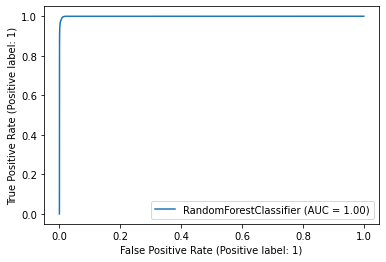

In [182]:
plt.figure(figsize=(3,4))
plot_roc_curve(rfcv_adasyn_best, X_train_adasyn, y_train_adasyn)

In [183]:
rfcv_adasyn_pred_test=rfcv_adasyn_best.predict(X_test)

In [184]:
#accuracy

accuracy_score(y_test, rfcv_adasyn_pred_test)

0.9851408668295835

In [185]:
tn, fp, fn, tp = confusion_matrix(y_test, rfcv_adasyn_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,114,18
Not Fraud,1040,70030


In [186]:
# Precision

rfcv_adasyn_precision = precision_score(y_test, rfcv_adasyn_pred_test)
rfcv_adasyn_precision

0.09878682842287695

In [187]:
#Recall

rfcv_adasyn_recall = recall_score(y_test, rfcv_adasyn_pred_test)
rfcv_adasyn_recall

0.8636363636363636

In [188]:
# f1 score

f1_score(y_test, rfcv_adasyn_pred_test)

0.17729393468118196

## XGBoost with CV and Hyper Parameter tuning post ADASYN

[15:42:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:45:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

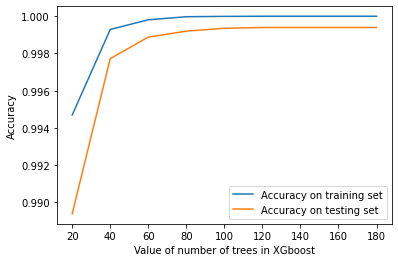

In [189]:
tree_range = range(20, 200, 20)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train_adasyn, y_train_adasyn)
    score1.append(xgb.score(X_train_adasyn, y_train_adasyn))
    score2.append(xgb.score(X_test,y_test))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [190]:
xgb_adasyn=XGBClassifier(n_estimators=120)
xgb_adasyn.fit(X_train_adasyn, y_train_adasyn)

[15:56:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=120, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [191]:
adasyn_xgb_pred_test=xgb_adasyn.predict(X_test)

In [192]:
#accuracy

accuracy_score(y_test, adasyn_xgb_pred_test)

0.9993960843796522

In [193]:
tn, fp, fn, tp = confusion_matrix(y_test, adasyn_xgb_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,113,19
Not Fraud,24,71046


In [194]:
# Precision

adasyn_xgb_precision = precision_score(y_test, adasyn_xgb_pred_test)
adasyn_xgb_precision

0.8248175182481752

In [195]:
#Recall

adasyn_xgb_recall = recall_score(y_test, adasyn_xgb_pred_test)
adasyn_xgb_recall

0.8560606060606061

In [196]:
# f1 score

f1_score(y_test, adasyn_xgb_pred_test)

0.8401486988847583

## Checking Performance of different models

In [202]:
model_scores = pd.DataFrame(
    {
        'Accuracy': [accuracy_score(y_test, lr_pred_test) , accuracy_score(y_test, dt_pred_test), accuracy_score(y_test, rfc_pred_test),
                    accuracy_score(y_test, xgb_pred_test), accuracy_score(y_test, lr_cv_pred_test), accuracy_score(y_test, dtcv_pred_test),
                    accuracy_score(y_test, rfcv_pred_test), accuracy_score(y_test, rfcv_oms_pred_test), accuracy_score(y_test, oms_xgb_pred_test),
                    accuracy_score(y_test, rfcv_ros_pred_test), accuracy_score(y_test, ros_xgb_pred_test), accuracy_score(y_test, rfcv_smote_pred_test),
                    accuracy_score(y_test, smote_xgb_pred_test), accuracy_score(y_test, rfcv_adasyn_pred_test), accuracy_score(y_test, adasyn_xgb_pred_test)],
        'Precision': [lr_precision, dt_precision, rfc_precision, xgb_precision, lr_cv_precision, dtcv_precision, rfcv_precision,
                     rfcv_oms_precision, oms_xgb_precision, rfcv_ros_precision, ros_xgb_precision, rfcv_smote_precision, smote_xgb_precision,
                     rfcv_adasyn_precision, adasyn_xgb_precision],
        'Recall': [lr_recall, dt_recall, rfc_recall, xgb_recall, lr_cv_recall, dtcv_recall, rfcv_recall, rfcv_oms_recall, oms_xgb_recall, rfcv_ros_recall,
                  ros_xgb_recall, rfcv_smote_recall, smote_xgb_recall, rfcv_adasyn_recall, adasyn_xgb_recall],
        'F1 Score': [f1_score(y_test, lr_pred_test), f1_score(y_test, dt_pred_test), f1_score(y_test, rfc_pred_test),
                    f1_score(y_test, xgb_pred_test), f1_score(y_test, lr_cv_pred_test), f1_score(y_test, dtcv_pred_test), f1_score(y_test, rfcv_pred_test),
                    f1_score(y_test, rfcv_oms_pred_test), f1_score(y_test, oms_xgb_pred_test), f1_score(y_test, rfcv_ros_pred_test), f1_score(y_test, ros_xgb_pred_test),
                    f1_score(y_test, rfcv_smote_pred_test), f1_score(y_test, smote_xgb_pred_test), f1_score(y_test, rfcv_adasyn_pred_test),
                    f1_score(y_test, adasyn_xgb_pred_test)],
    }, index=['LR basic', 'DT Basic', 'RF Basic', 'XGBoost basic', 'LR with CV and class balance', 'DT with CV and class balance',
             'RF with CV and class balance', 'OMS RF', 'OMS XGBoost', 'ROS RF',
             'ROS XGBoost', 'SMOTE RF', 'SMOTE XGBoost', 'ADASYN RF', 'ADASYN XGBoost'])
model_scores

,Accuracy,Precision,Recall,F1 Score
LR basic,0.999256,0.924731,0.651515,0.764444
DT Basic,0.999228,0.798450,0.651515,0.789272
RF Basic,0.999621,0.981651,0.810606,0.887967
XGBoost basic,0.999621,0.981651,0.810606,0.887967
LR with CV and class balance,0.987065,0.111330,0.856061,0.197036
DT with CV and class balance,0.998455,0.558511,0.795455,0.656250
RF with CV and class balance,0.999424,0.858268,0.825758,0.841699
OMS RF,0.999368,0.822222,0.840909,0.831461
OMS XGBoost,0.999452,0.860465,0.840909,0.850575
ROS RF,0.999270,0.781690,0.840909,0.810219


In [204]:
model_scores['F1 Score'].max()

0.8879668049792531

In [205]:
model_scores['Precision'].max()

0.981651376146789

In [206]:
model_scores['Recall'].max()

0.8636363636363636

From the above Dataframe we can observe that some models are giving good precision/ recall/ F1 score but failing in other scores.

Hence for to choose an ideal model would be a model with good recall and good F1 score.

ADASYN XGBoost:

    Accuracy: 0.999396
    Precision: 0.824818
    Recall : 0.856061
    F1 Score: 0.840149
        
SMOTE XGBoost

    Accuracy: 0.999424
    Precision: 0.837037
    Recall: 0.856061
    F1 Score: 0.846442

As SMOTE XGBoost is performing better than ADASYN XGBoost, Let's take that as our final model.

In [210]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, smote_xgb_pred_test)
roc_auc = metrics.auc(fpr, tpr)

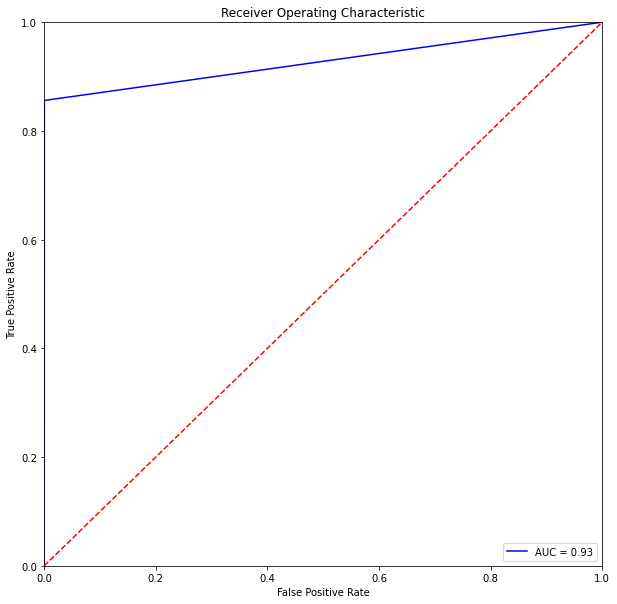

In [221]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<AxesSubplot:>

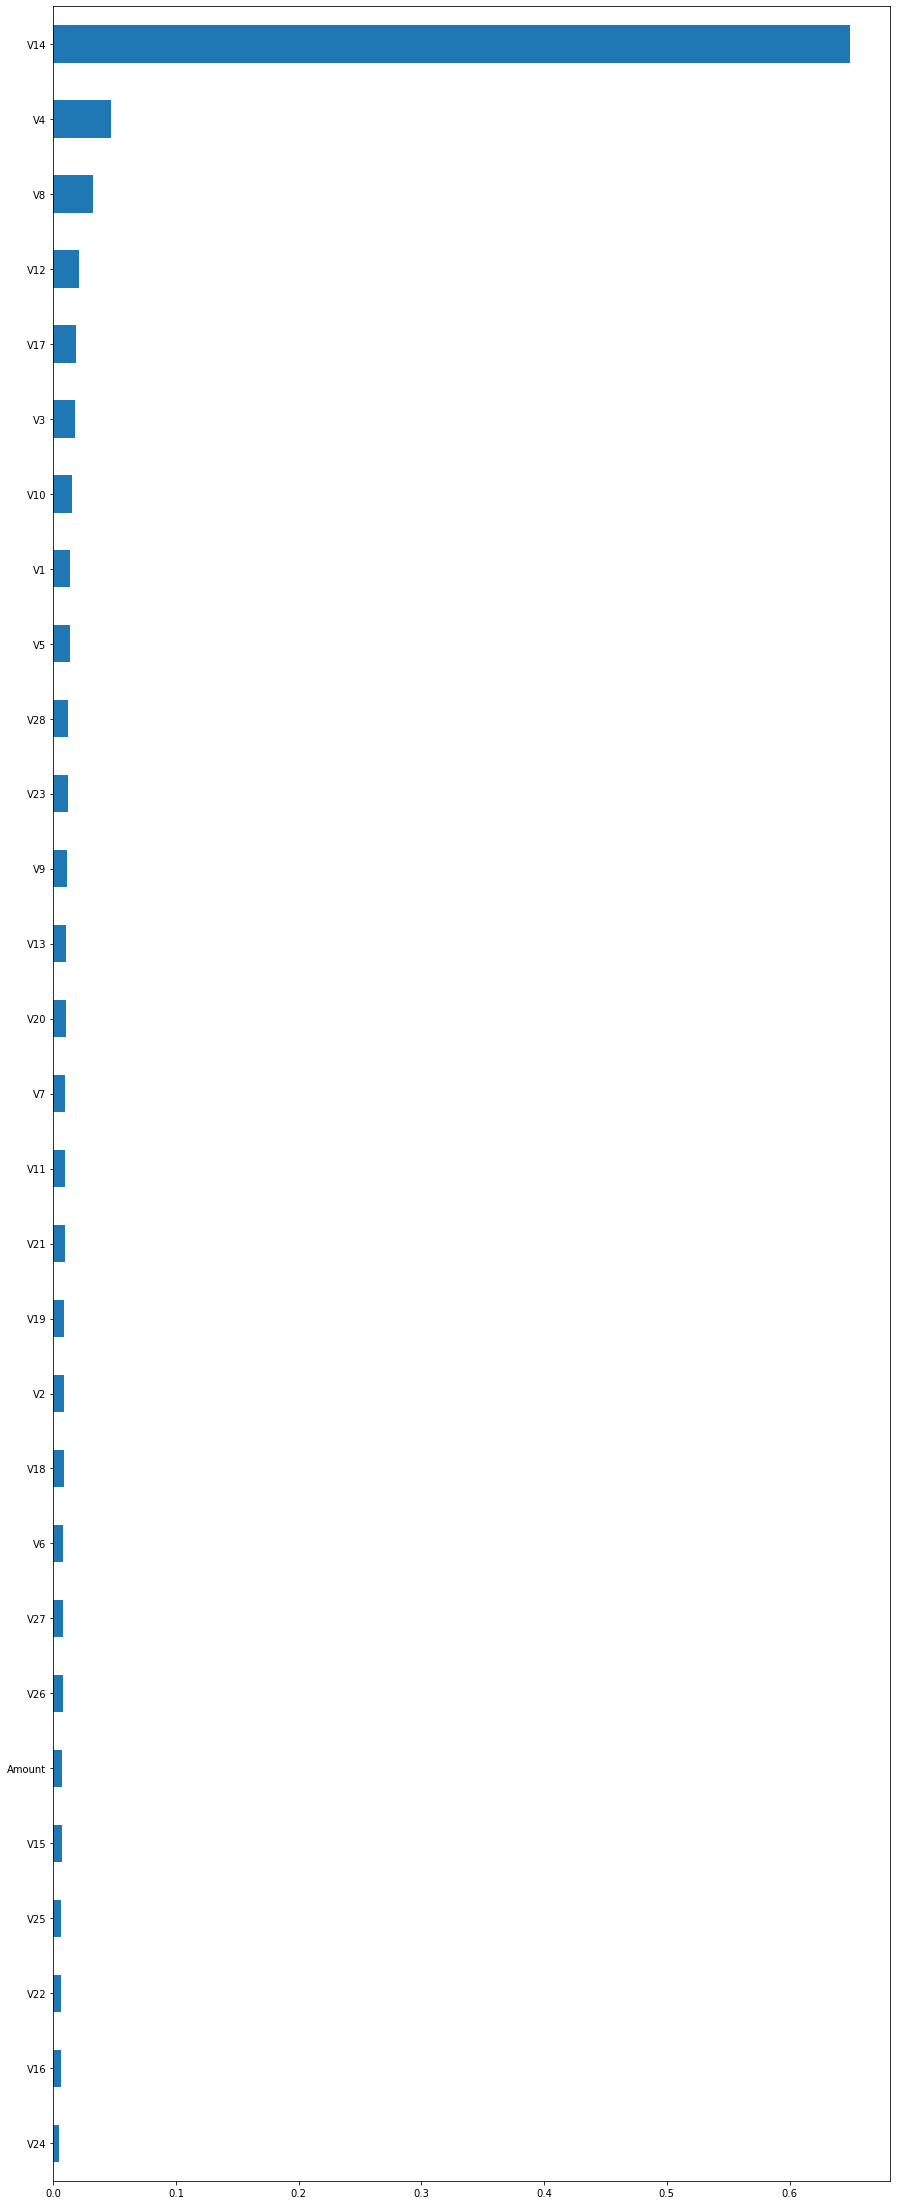

In [208]:
plt.figure(figsize=(15,40))
feat_importances = pd.Series(xgb_smote.feature_importances_, index=col)
feat_importances.nlargest(len(col)).sort_values().plot(kind='barh', align='center')

# Conclusion


**Though we don't have much information about the columns , but we can say that V14, V4, V8, V12 and V17 are the top five important columns.**

Top var = 14
2nd Top var = 4
3rd Top var = 8


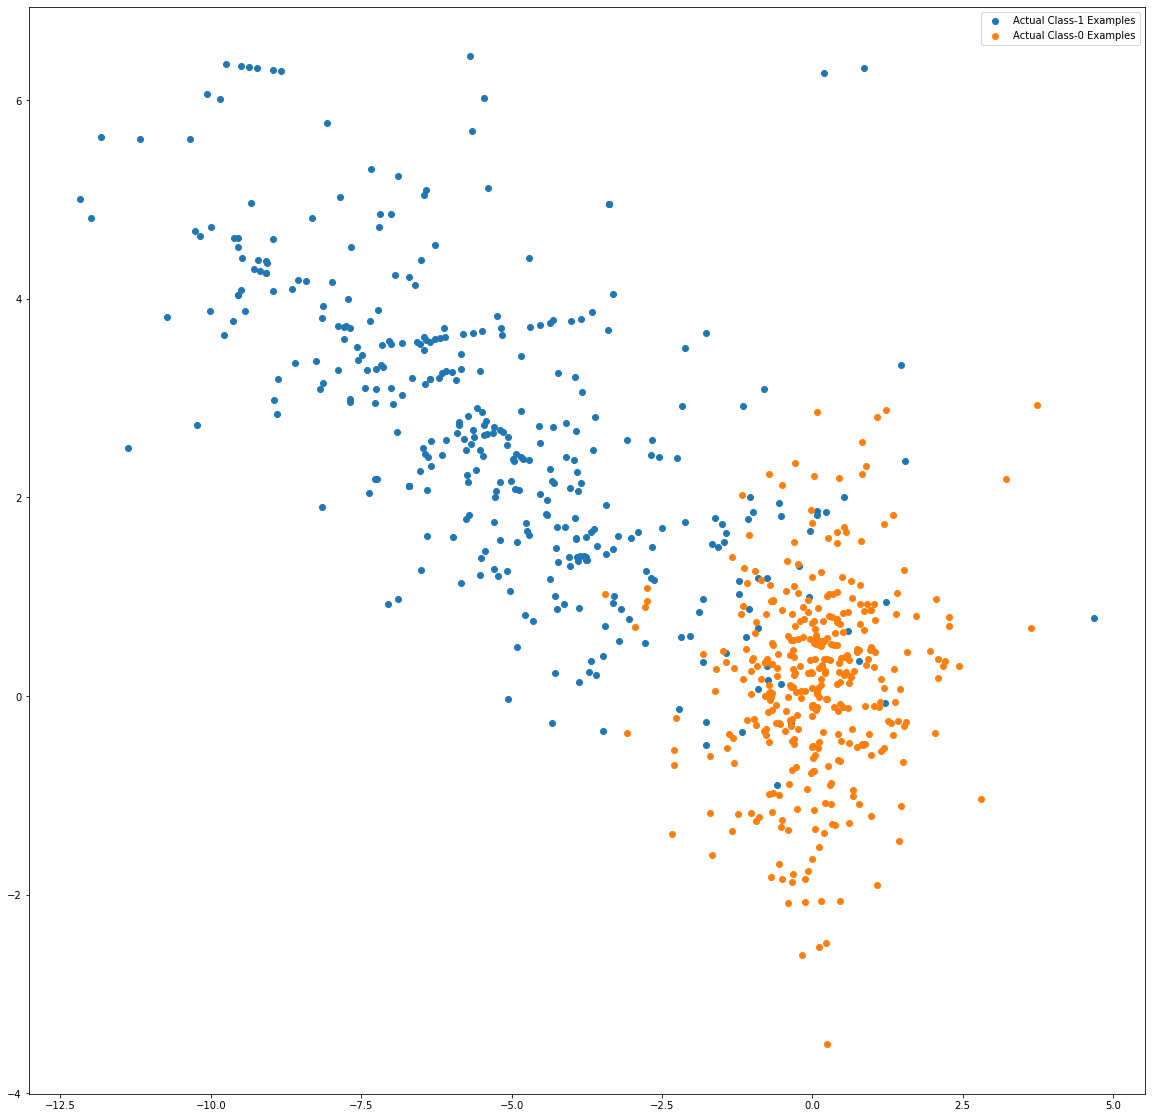

In [209]:
var_imp = []
for i in xgb_smote.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_smote.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_smote.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_smote.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_smote.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_smote.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()